In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
pro=pd.read_csv('insurance.csv')
pro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
pro.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
pro.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
pro.shape

(1338, 7)

In [9]:
# value count for categorical data
print(pro.sex.value_counts())
print(pro.children.value_counts())
print(pro.smoker.value_counts())
print(pro.region.value_counts())

male      676
female    662
Name: sex, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [7]:
# change Male female to numerical value for mutliplication of beta
pro['sex']=pro['sex'].map({'male':1, 'female':0})
pro['smoker']=pro['smoker'].map({'yes':1, 'no':0})
pro['region']=pro['region'].map({'southeast':0, 'southwest':1,'northwest':2,'northeast':3})

In [10]:
pro

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

## analysis single variable at a time is called univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

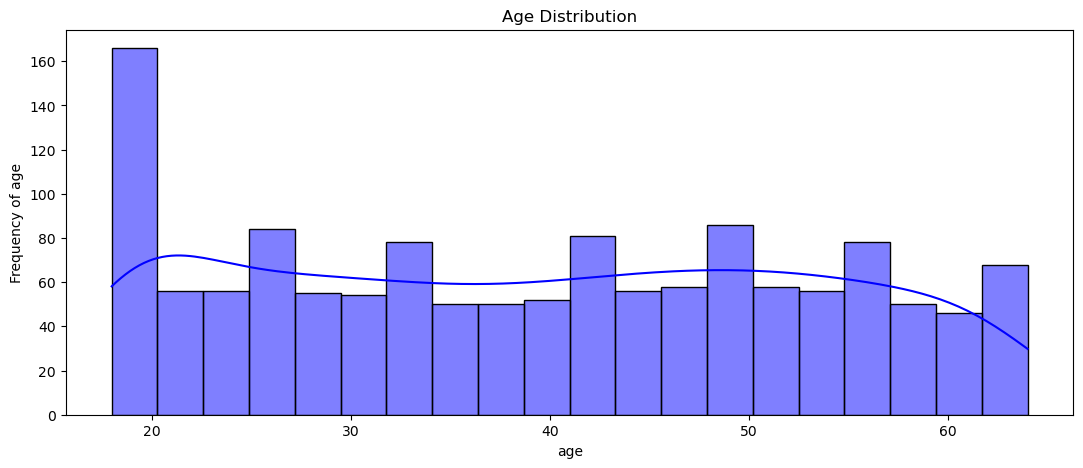

In [21]:
#checking Age Distribution
plt.figure(figsize=(13,5))
sns.histplot(pro.age,bins=20,kde=True,color='blue')
plt.title('Age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency of age')
plt.show

 #### Maximum people in dataset have a age of below 20

Text(0.5, 1.0, 'Age distribution')

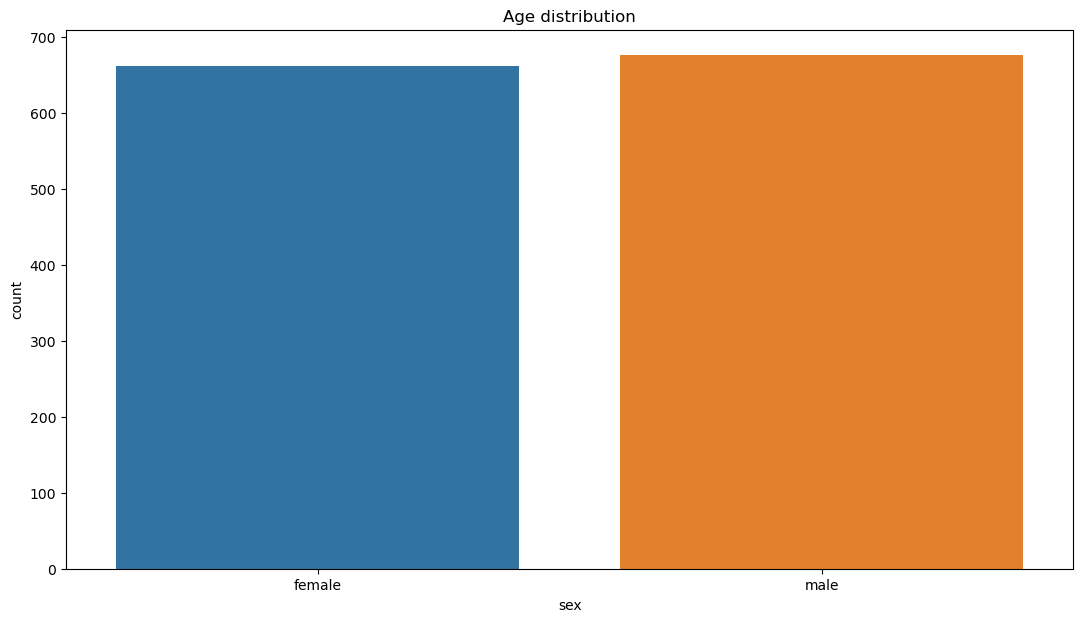

In [22]:
plt.figure(figsize=(13,7))
sns.countplot(x='sex', data=pro)
plt.title('Age distribution')

#### Male and Female are almost same in number

<function matplotlib.pyplot.show(close=None, block=None)>

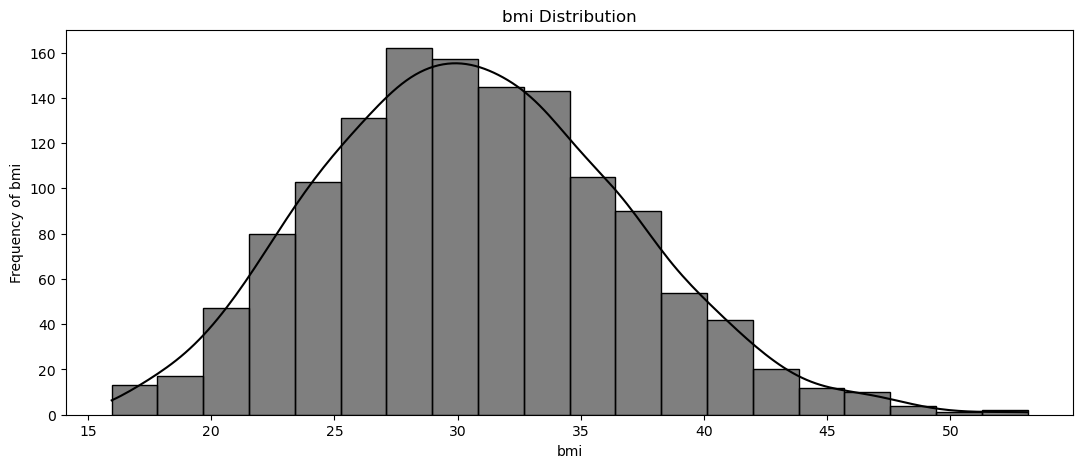

In [11]:
plt.figure(figsize=(13,5))
sns.histplot(pro.bmi,bins=20,kde=True,color='black')
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency of bmi')
plt.show

#### The majority of the people have bmi in betweem 25 to 40, which considered as overweight could be a major factor in increasing medical cost

<function matplotlib.pyplot.show(close=None, block=None)>

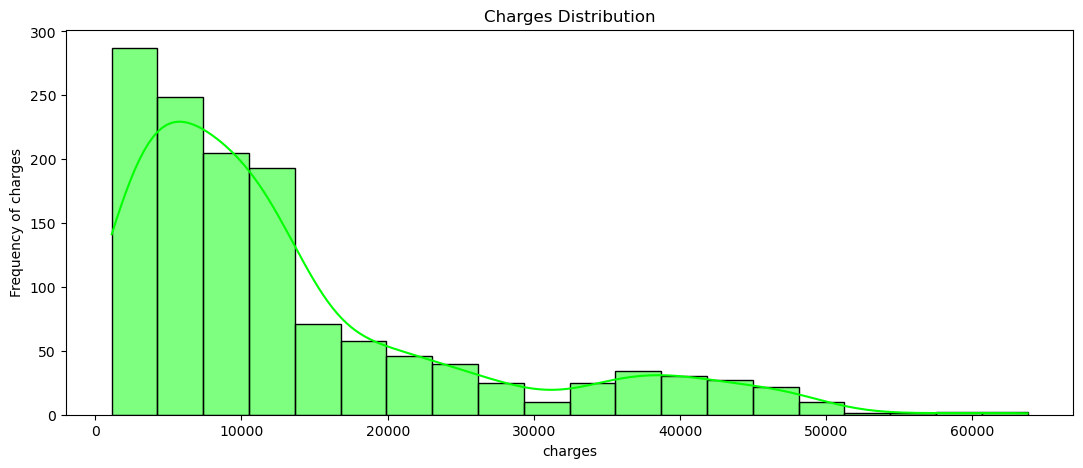

In [23]:
#checking charges Distribution
plt.figure(figsize=(13,5))
sns.histplot(pro.charges,bins=20,kde=True,color='lime')
plt.title('Charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency of charges')
plt.show

## Bi Variate variables

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1300x500 with 0 Axes>

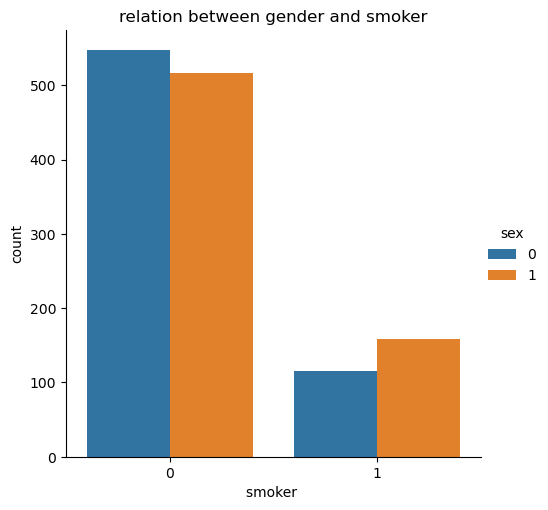

In [13]:
plt.figure(figsize=(13,5))
sns.catplot(x='smoker',kind='count',hue='sex',data=pro)
plt.title('relation between gender and smoker')
plt.xlabel('smoker ')
plt.ylabel('count')
plt.show

<Axes: xlabel='charges', ylabel='smoker'>

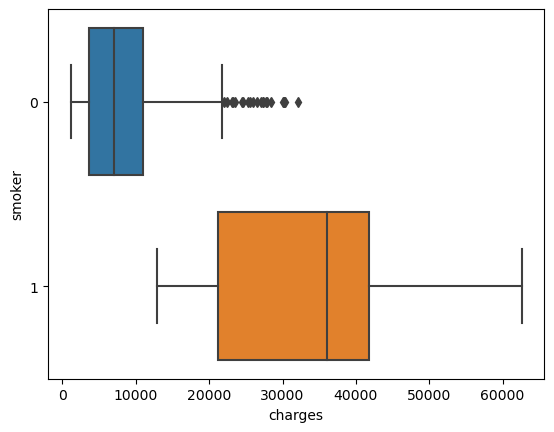

In [14]:
# for male 
sns.boxplot(y = 'smoker', x = 'charges', data = pro[(pro.sex == 1)], orient = 'h')

<Axes: xlabel='charges', ylabel='smoker'>

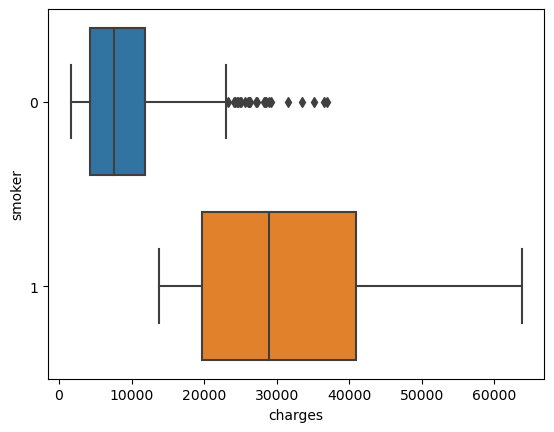

In [15]:
# for female
sns.boxplot(y = 'smoker', x = 'charges', data = pro[(pro.sex == 0)], orient = 'h')

 #### the assumption is true that the medical expense of the males is greater than female in addition to the medical expense of smoker is greater than of females

In [16]:
cor = pro.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<Axes: >

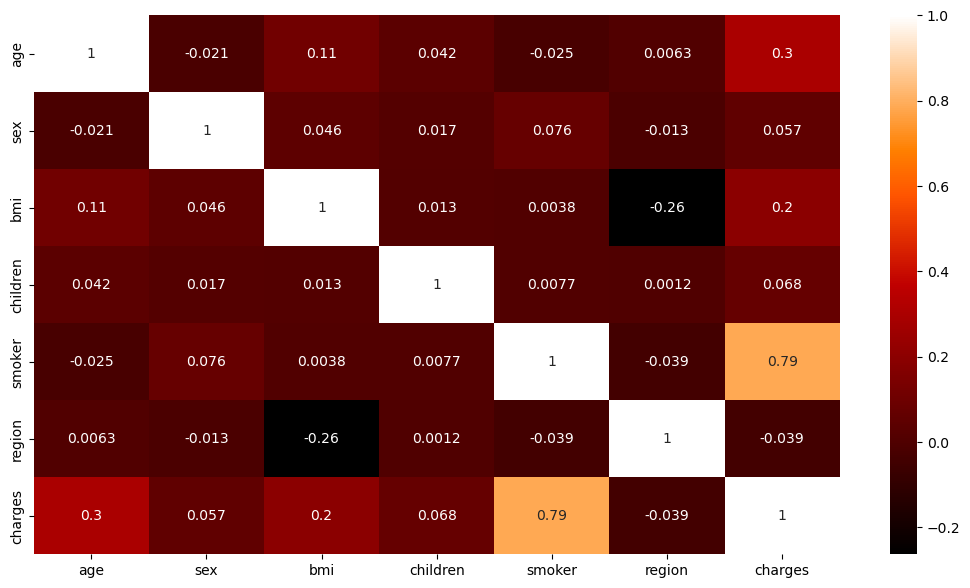

In [17]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True, cmap = 'gist_heat')

#### By above plot we can observe that smoker has more medical expenses so it has a high impact on insurance charge followed by age and bmi whereas region ,gender and children has no impact 

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1300x500 with 0 Axes>

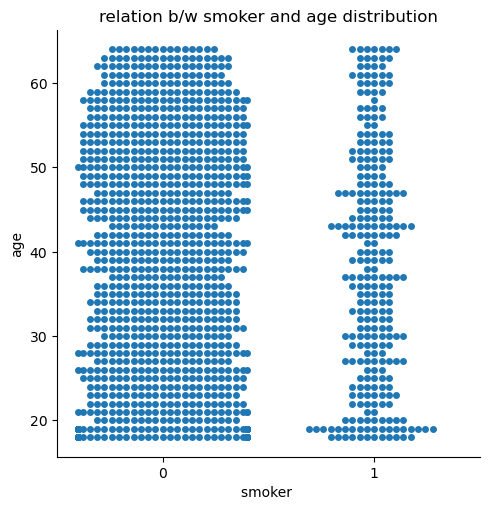

In [18]:
# relation b/w smoker and age distribution
plt.figure(figsize=(13,5))
sns.catplot(x='smoker',y='age',kind='swarm',data=pro)
plt.title('relation b/w smoker and age distribution')
plt.xlabel('smoker ')
plt.ylabel('age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

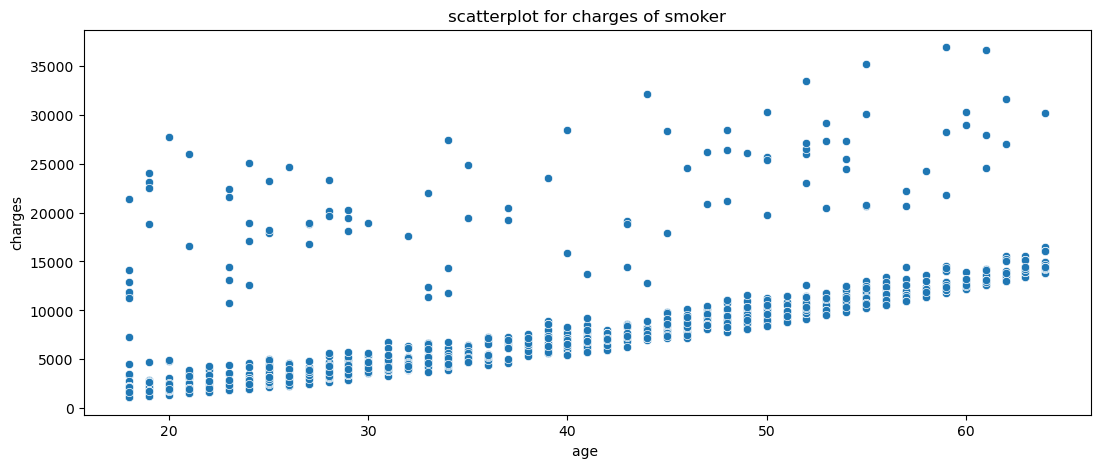

In [19]:
#for non smorker
plt.figure(figsize=(13,5))
sns.scatterplot(x='age', y ='charges',data=pro[(pro.smoker==0)])
plt.title('scatterplot for charges of smoker')
plt.xlabel('age ')
plt.ylabel('charges')
plt.show

#### Majority of the points show that medical expenses increases with the age which may due to the fact that older people are more prone to illnes but there are outliers which showa other illness or expenses which may lead to increase in medical expense

<function matplotlib.pyplot.show(close=None, block=None)>

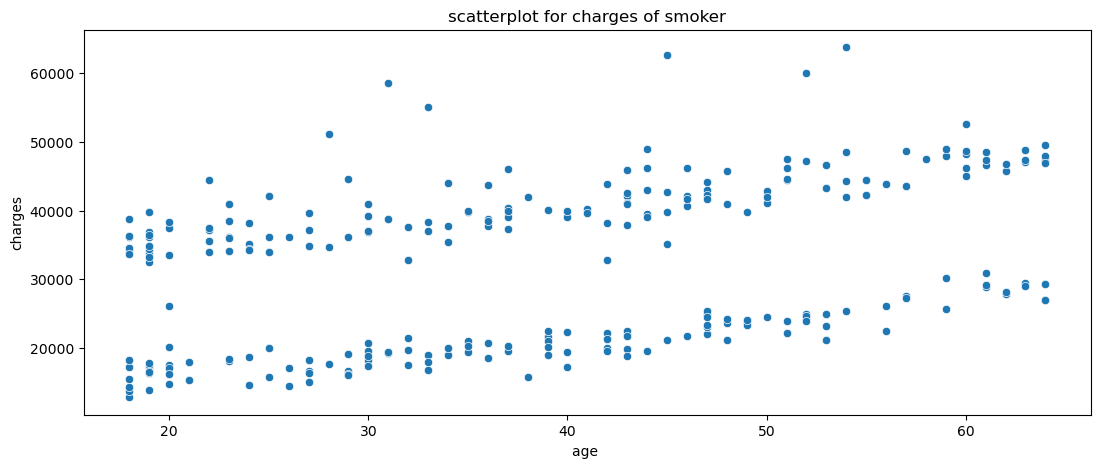

In [20]:
#for smoker
plt.figure(figsize=(13,5))
sns.scatterplot(x='age', y ='charges',data=pro[(pro.smoker==1)])
plt.title('scatterplot for charges of smoker')
plt.xlabel('age ')
plt.ylabel('charges')
plt.show

#### in this  graph there are two segments  one with high medical expense which may due to the smoking related illness and with low medical expense which may due to age related ilnness 
NOw in order to get more clear we can combine both graphs

<Figure size 1300x700 with 0 Axes>

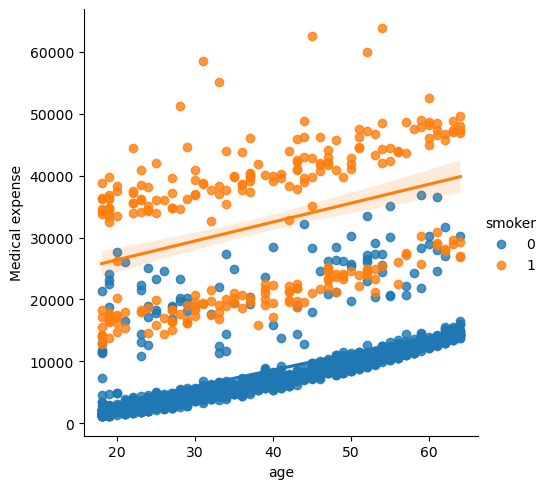

In [21]:
# age charges distribution
plt.figure(figsize=(13,7))
sns.lmplot(x='age',y='charges',data = pro, hue='smoker')
plt.xlabel('age')
plt.ylabel('Medical expense')
plt.show()

### Now we clearly understand the variation in charges with respect to age and smoking habits the medical expenses of smoker is higher than that of non-smokers irrespective of age in non-smokers the cost of treatment increases with age which is obvious

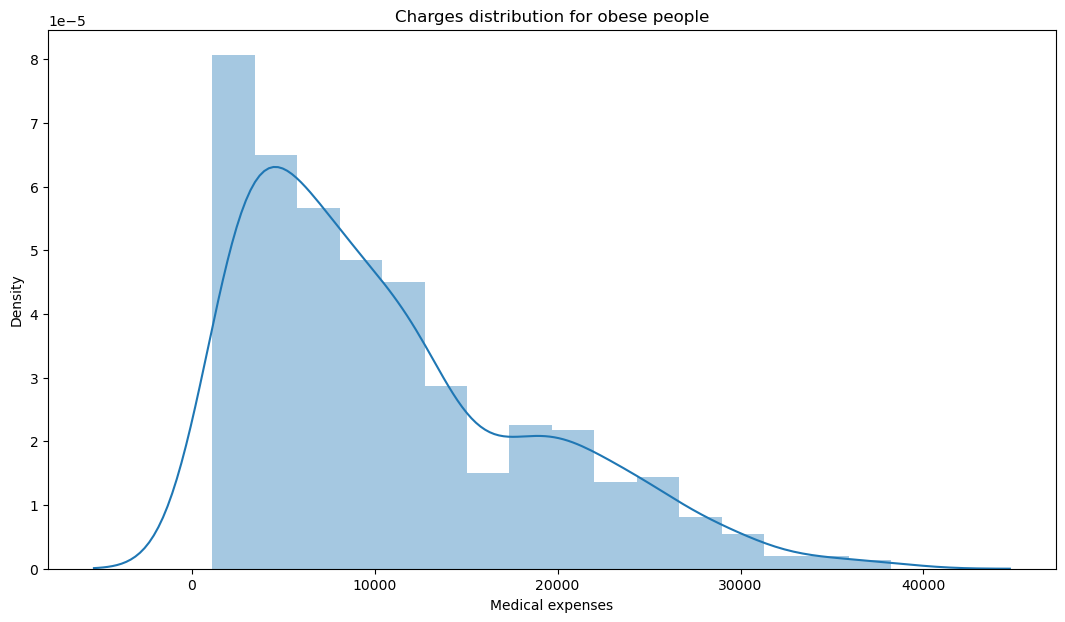

In [22]:
# relation b/w bmi and medical expenses 
plt.figure(figsize=(13,7))
sns.distplot(pro[(pro.bmi<30)]['charges'])
plt.title('Charges distribution for obese people')
plt.xlabel('Medical expenses')
plt.show()

#### therefore, people with BMI less than 30 are spending less where as people with BMI more than 30 are spending more

## Model Building & Evaluation

Linear Regression

In [23]:
X=pro.drop("charges", axis=1)
y=pro.charges

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)


In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [26]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
reg.coef_

array([  247.15301475,  -208.75389868,   335.5649497 ,   605.2002184 ,
       23768.1421239 ,   306.74546985])

In [28]:
#MAking predication on training
y_pre=reg.predict(X_train)

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train,y_pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train,y_pre)))
print('R2 Score:', metrics.r2_score(y_train,y_pre))

MAE: 4191.35560801314
RMSE: 6017.028554885625
R2 Score: 0.7502234681317635


In [30]:
#MAking predication
y_pred=reg.predict(X_test)


In [31]:
#Model Evaluation             ###if we have outlier we find mean absolute error  
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 Score:', metrics.r2_score(y_test,y_pred))

MAE: 4174.7295580490545
RMSE: 6135.665214206238
R2 Score: 0.7505625600466854


## Polynomial Regression

In [32]:

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [33]:
#transforming the fearture to the higher degreee
X_train_poly=poly_reg.fit_transform(X_train)
#splitting the data
X_train, X_test, y_train,y_test=train_test_split(X_train_poly, y_train,test_size=0.25,random_state=2)


In [34]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((752, 28), (251, 28), (752,), (251,))

In [35]:
#train thr model
plr= LinearRegression()
plr.fit(X_train,y_train)

LinearRegression()

In [36]:
#MAking predication
y_pred_plr=plr.predict(X_test)


In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_plr)))
print('R2 Score:', metrics.r2_score(y_test,y_pred_plr))

MAE: 3756.262844223108
RMSE: 5419.753011375457
R2 Score: 0.7799087453433923


#### MY model able to explain 77% of the total data set

### Making a Predication System

In [48]:
#inpaut the values
age=21
sex=1
bmi=27
children=0
smoker=0
region=2

In [39]:
charge=reg.predict([[age,sex,bmi,children,smoker,region]])

print('the charge of this new patient is $',round(charge[0],2))


the charge of this new patient is $ 2117.96


 ### OLS MODEL

In [40]:
import statsmodels.api as sm

In [41]:
#add constant to predicator values
X=sm.add_constant(X)

In [42]:
result=sm.OLS(y,X).fit()

In [43]:
#print the summary table
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.4
Date:                Mon, 11 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:44:32   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.312e+04   1045.495    -12.545      0.000   -1.52e+04   -1.11e+04
age          256.7110     11.889     21.591      0.000     233.387     280.035
sex         -131.1836    332.750     -0.394      0.693    -783.955     521.588
bmi          340.6340     28.382     12.002      0.000     284.956     396.312
children     473.2400    137.603      3.439      0.001     203.297     743.183
smoker      2.386e+04    412.072     57.907      0.000    2.31e+04    2.47e+04
region       369.8163    152.160      2.430      0.015      71.317     668.315
==============================================================================
Omnibus:                      301.623   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.624
Skew:                           1.215   Prob(JB):                    7.36e-158
Kurtosis:                       5.660   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### REGULARIZATION

In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [45]:
#Ridge Regression
Ridgemodel=Ridge()
Ridgemodel

Ridge()

In [46]:
# training the model
Ridgemodel.fit(X_train,y_train)

Ridge()

In [47]:
# testing the Model
r_pred=Ridgemodel.predict(X_test)
r2_score(y_test,r_pred)

0.8159585140950294